In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.python.keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

In [ ]:
from keras.datasets import imdb
(train_data,train_targets),(test_data,test_targets)= imdb.load_data(num_words=10000)
db=np.concatenate((train_data,test_data),axis=0)
targets=np.concatenate((train_targets,test_targets),axis=0)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
print('categories:',np.unique(targets))
print('No.of unique words:',len(np.unique(np.hstack(db))))

categories: [0 1]
No.of unique words: 9998


In [ ]:
length=[len(i) for i in db]
print('avg review length:',np.mean(length))
print("standard deviation:",round(np.std(length)))

avg review length: 234.75892
standard deviation: 173


In [ ]:
print('label:',targets[0])
print(db[0])

label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
index=imdb.get_word_index()
reverse_index=dict([(value,key) for (key,value) in index.items()])
decoder=' '.join([reverse_index.get(i - 3,'#') for i in db[0]])
print(decoder)


1641221/1641221 [==============================] - 1s 1us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [ ]:
def vectorize(sequences,dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
      results[i,sequence]=1
  return results

db=vectorize(db)
targets=np.array(targets).astype('float32')

In [ ]:
test_x = db[:10000]
test_y = targets[:10000]
train_x = db[10000:]
train_y = targets[10000:]
model=models.Sequential()
model.add(layers.Dense(50,activation='relu',input_shape=(10000, )))
model.add(layers.Dropout(0.3,noise_shape=None,seed=None))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dropout(0.2,noise_shape=None,seed=None))
model.add(layers.Dense(50,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_x,train_y,epochs=5,batch_size=500,validation_data=(test_x,test_y))

Epoch 1/5
80/80 [==============================] - 8s 28ms/step - loss: 0.4168 - accuracy: 0.8077 - val_loss: 0.2685 - val_accuracy: 0.8923
Epoch 2/5
80/80 [==============================] - 1s 17ms/step - loss: 0.2161 - accuracy: 0.9180 - val_loss: 0.2616 - val_accuracy: 0.8973
Epoch 3/5
80/80 [==============================] - 1s 16ms/step - loss: 0.1576 - accuracy: 0.9419 - val_loss: 0.2937 - val_accuracy: 0.8913
Epoch 4/5
80/80 [==============================] - 1s 16ms/step - loss: 0.1098 - accuracy: 0.9620 - val_loss: 0.3396 - val_accuracy: 0.8867
Epoch 5/5
80/80 [==============================] - 1s 17ms/step - loss: 0.0755 - accuracy: 0.9741 - val_loss: 0.4084 - val_accuracy: 0.8854


In [ ]:
print('test-accuracy:',np.mean(history.history['val_accuracy']))

test-accuracy: 0.8906000018119812


In [ ]:
epochs=5

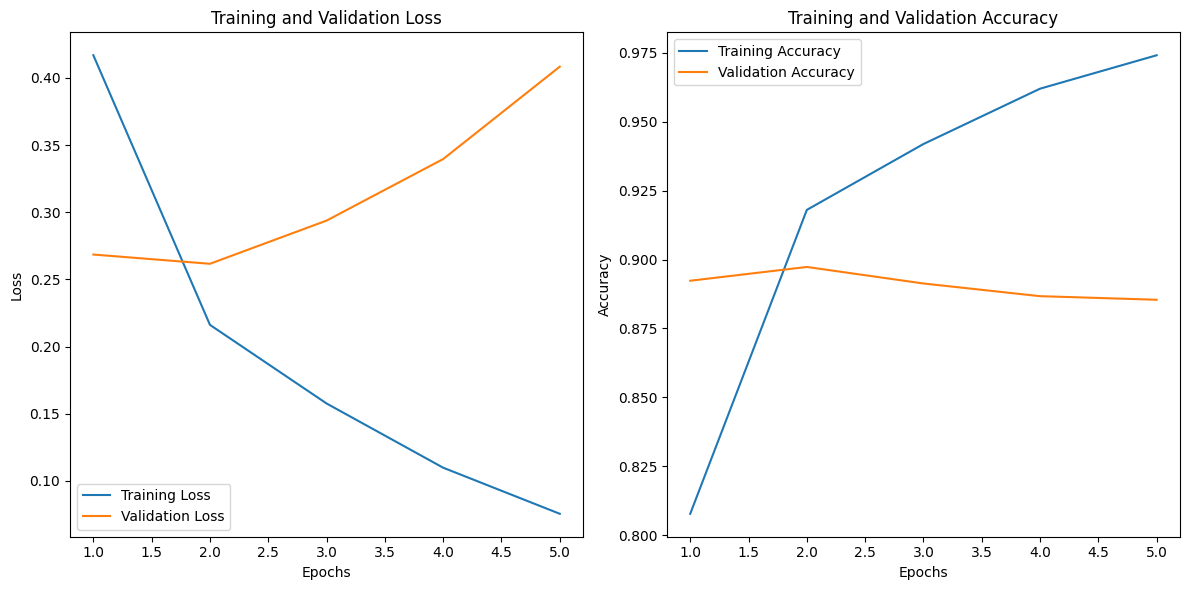

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, epochs+1), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, epochs+1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, epochs+1), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [ ]:
y_pred=(model.predict(test_x)>0.5).astype(int)

313/313 [==============================] - 1s 2ms/step


In [ ]:
precision=precision_score(test_y,y_pred)
recall=recall_score(test_y,y_pred)
f1=f1_score(test_y,y_pred)

In [ ]:
print(precision)
print(recall)
print(f1)

0.8849261083743842
0.8887789432020582
0.8868483412322276
